**Given CiFAR-10 dataset, implement a linear SVM classifier to predict the classes of the test images.**

In [0]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm
from six.moves import cPickle as pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
import random

**Accuracy calculation**

In [0]:
def accuracy(y_real, y_pred):
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

In [0]:
def load_data(file_name):
    file = open(file_name, 'rb')
    datadict = pickle.load(file, encoding='latin1')
    X = datadict['data']
    Y = datadict['labels']
    X = np.array(X)
    Y = np.array(Y)
    file.close()
    return X, Y

**Load data**

In [0]:
base_dir = '/content/data/'
temp_xtrain = []
temp_ytrain = []
for i in range(1,6):
    temp_dir = os.path.join(base_dir, 'data_batch_%d' % (i, ))
    file = open(temp_dir, 'rb')
    datadict = pickle.load(file, encoding='latin1')
    X = datadict['data']
    Y = datadict['labels']
    X = np.array(X)
    Y = np.array(Y)
    temp_xtrain.append(X)
    temp_ytrain.append(Y)
X_train = np.concatenate(temp_xtrain)
Y_train = np.concatenate(temp_ytrain)
test_dir = os.path.join(base_dir, 'test_batch')
file = open(test_dir, 'rb')
datadict = pickle.load(file, encoding='latin1')
X_test = datadict['data']
Y_test = datadict['labels']
X_test = np.array(X_test)
Y_test = np.array(Y_test)

**Classes**

In [118]:
class_name_dir = os.path.join(base_dir, 'batches.meta')
file = open(class_name_dir, mode='rb')
data = pickle.load(file,  encoding='latin1')
class_labels = data['label_names']
file.close()
class_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
X_train_copy = X_train

**Applied PCA on original data set and reduced dimensionality to 40**

In [0]:
pca = PCA(n_components=40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

**Standardize features by removing the mean and scaling to unit variance**

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
c = [0.0001,0.001,0.01,0.1,1]
accuracies = []

**Support vector machine with the parameter for the soft margin cost function, C = 0.0001**

In [124]:
i1 = 0.0001
svc1 = svm.SVC(kernel='linear',C=i1)
svc1.fit(X_train, Y_train) 
y_predict1 = svc1.predict(X_test)
acc1 = np.mean(y_predict1 == Y_test)
accuracies.append(acc1)
print("C = ",i1)
print('Accuracy = ',acc1)

C =  0.0001
Accuracy =  0.3726


In [125]:
print(confusion_matrix(Y_validation, y_predict1))

[[ 91  92  93 152  69  76 150  80  98 113]
 [ 96  97  98 135  55  68 131  83 117 134]
 [ 77  90 101 127  55  59 138  72 112 121]
 [ 86 102 100 141  68  64 126  75 117 137]
 [100  82  83 147  73  56 158  86  99 113]
 [ 82 106  94 151  51  76 145  75 133 112]
 [ 91 100  84 139  67  65 125  56 132 121]
 [ 87 100  66 152  57  69 139  72 115 120]
 [ 90  89  85 136  66  58 138  69 135 137]
 [ 80  97 104 139  76  60 150  72 126 118]]


In [126]:
print(classification_report(Y_validation, y_predict1))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10      1014
           1       0.10      0.10      0.10      1014
           2       0.11      0.11      0.11       952
           3       0.10      0.14      0.12      1016
           4       0.11      0.07      0.09       997
           5       0.12      0.07      0.09      1025
           6       0.09      0.13      0.11       980
           7       0.10      0.07      0.08       977
           8       0.11      0.13      0.12      1003
           9       0.10      0.12      0.10      1022

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



**Support vector images**

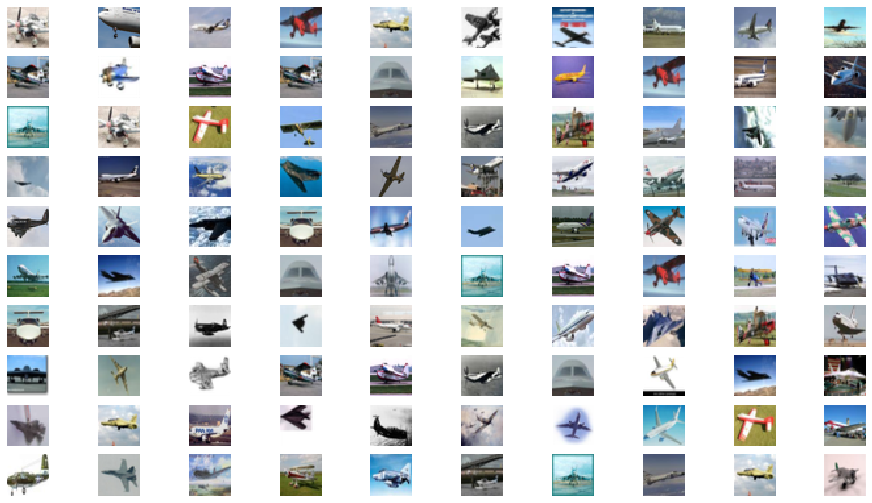

In [162]:
sv1 = svc1.support_
sv1 = sv1[:200]
xx = X_train_copy.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(10,10,figsize=(16,9))
for j in range(10):
    for k in range(10):
        i = np.random.choice(sv1)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xx[i:i+1][0],interpolation='nearest')

**Support vector machine with the parameter for the soft margin cost function, C = 0.001**

In [129]:
i2 = 0.001
svc2 = svm.SVC(kernel='linear',C=i2)
svc2.fit(X_train, Y_train) 
y_predict2 = svc2.predict(X_test)
acc2 = np.mean(y_predict2 == Y_test)
accuracies.append(acc2)
print("C = ",i2)
print('Accuracy = ',acc2)

C =  0.001
Accuracy =  0.3906


In [130]:
print(confusion_matrix(Y_validation, y_predict2))

[[115  93 100 106  82  92 151  89  82 104]
 [110 107  98 102  72  75 131  91 108 120]
 [ 95  89 103  97  70  72 138  71 104 113]
 [100 110  98  99  81  82 117  86 106 137]
 [110  90  94 110  89  75 146  84  99 100]
 [107 115  96 121  66  93 122  83 119 103]
 [100 103  84 109  75  75 122  79 120 113]
 [100 107  76 115  77  71 125  77 107 122]
 [113 100  88 104  74  74 137  71 124 118]
 [109 106  95  99  90  78 142  79 114 110]]


In [131]:
print(classification_report(Y_validation, y_predict2))

              precision    recall  f1-score   support

           0       0.11      0.11      0.11      1014
           1       0.10      0.11      0.11      1014
           2       0.11      0.11      0.11       952
           3       0.09      0.10      0.10      1016
           4       0.11      0.09      0.10       997
           5       0.12      0.09      0.10      1025
           6       0.09      0.12      0.11       980
           7       0.10      0.08      0.09       977
           8       0.11      0.12      0.12      1003
           9       0.10      0.11      0.10      1022

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



**Support vector images**

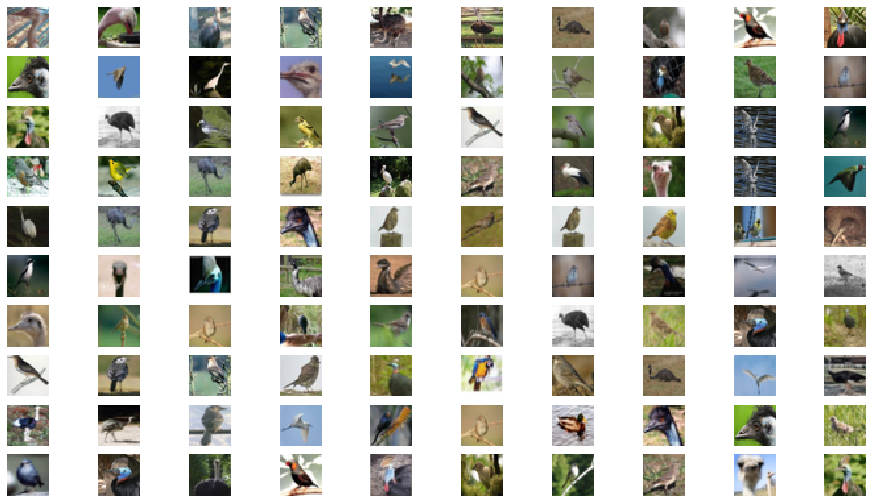

In [161]:
sv2 = svc2.support_
sv2 = sv2[10000:10200]
xx = X_train_copy.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(10,10,figsize=(16,9))
for j in range(10):
    for k in range(10):
        i = np.random.choice(sv2)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xx[i:i+1][0],interpolation='nearest')

**Support vector machine with the parameter for the soft margin cost function, C = 0.01**

In [133]:
i3 = 0.01
svc3 = svm.SVC(C=i3, kernel='linear')
svc3.fit(X_train, Y_train) 
y_predict3 = svc3.predict(X_test)
acc3 = np.mean(y_predict3 == Y_test)
accuracies.append(acc3)
print("C = ",i3)
print('Accuracy = ',acc3)

C =  0.01
Accuracy =  0.3892


In [0]:
print(confusion_matrix(Y_validation, y_predict3))

[[455  63  25  18  17  23  36  72 209  96]
 [ 56 539  12  11  23  19  55  53  77 169]
 [ 90  69 194  48  82  89 167 109  63  41]
 [ 71  83  61 176  47 194 174  56  85  69]
 [ 74  45 102  43 230  72 196 154  33  48]
 [ 55  74  72 108  47 339 135  88  61  46]
 [ 21  66  53  63  78  75 511  50  26  37]
 [ 40  62  53  37  57  80  55 451  35 107]
 [150  87   6  14   9  26  10  24 583  94]
 [ 64 177  10  14   9  18  38  67 116 509]]


In [0]:
print(classification_report(Y_validation, y_predict3))

              precision    recall  f1-score   support

           0       0.42      0.45      0.44      1014
           1       0.43      0.53      0.47      1014
           2       0.33      0.20      0.25       952
           3       0.33      0.17      0.23      1016
           4       0.38      0.23      0.29       997
           5       0.36      0.33      0.35      1025
           6       0.37      0.52      0.43       980
           7       0.40      0.46      0.43       977
           8       0.45      0.58      0.51      1003
           9       0.42      0.50      0.45      1022

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.38     10000
weighted avg       0.39      0.40      0.39     10000



**Support vector images**

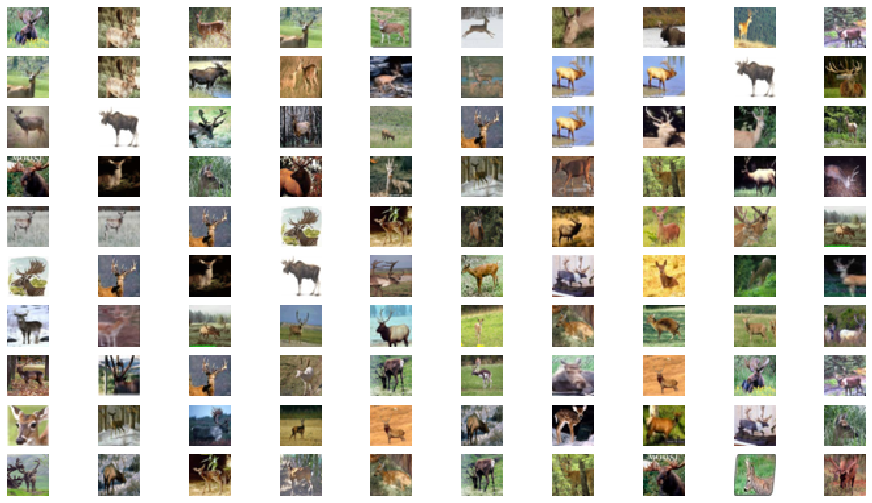

In [160]:
sv3 = svc3.support_
sv3 = sv3[20000:20200]
xx = X_train_copy.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(10,10,figsize=(16,9))
for j in range(10):
    for k in range(10):
        i = np.random.choice(sv3)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xx[i:i+1][0],interpolation='nearest')

**Support vector machine with the parameter for the soft margin cost function, C = 0.1**

In [134]:
i8 = 0.1
svc8 = svm.SVC(C=i8, kernel='linear')
svc8.fit(X_train, Y_train) 
y_predict8 = svc8.predict(X_test)
acc8 = np.mean(y_predict8 == Y_test)
accuracies.append(acc8)
print("C = ",i8)
print('Accuracy = ',acc8)

C =  0.1
Accuracy =  0.3892


In [136]:
print(confusion_matrix(Y_validation, y_predict8))

[[118  87  97 100  84 104 151  87  84 102]
 [119 110 104  98  71  83 125  88 105 111]
 [ 94  90 112  97  67  72 131  71 109 109]
 [103 113 104  96  76  88 108  89 106 133]
 [113  89  95 102  87  82 141  90  96 102]
 [109 120  99 111  69  93 128  85 115  96]
 [101  98  94  98  71  79 121  82 127 109]
 [102 111  84 114  69  73 123  76 107 118]
 [119 103  87  93  79  77 135  72 120 118]
 [113 108 100  94  92  75 142  85 109 104]]


In [137]:
print(classification_report(Y_validation, y_predict8))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11      1014
           1       0.11      0.11      0.11      1014
           2       0.11      0.12      0.12       952
           3       0.10      0.09      0.10      1016
           4       0.11      0.09      0.10       997
           5       0.11      0.09      0.10      1025
           6       0.09      0.12      0.11       980
           7       0.09      0.08      0.08       977
           8       0.11      0.12      0.12      1003
           9       0.09      0.10      0.10      1022

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



**Support vector images**

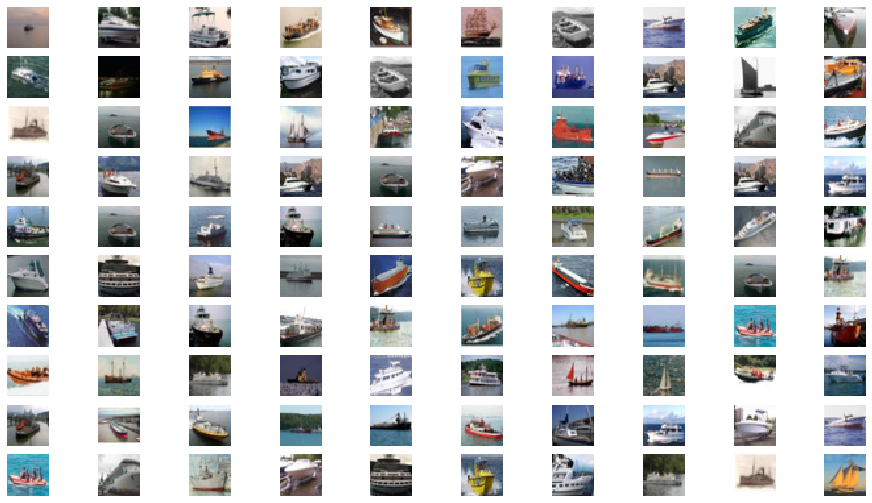

In [159]:
sv8 = svc8.support_
sv8 = sv8[40000:40200]
xx = X_train_copy.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(10,10,figsize=(16,9))
for j in range(10):
    for k in range(10):
        i = np.random.choice(sv8)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xx[i:i+1][0],interpolation='nearest')

**Support vector machine with the parameter for the soft margin cost function, C = 1**

In [135]:
i5 = 1
svc5 = svm.SVC(C = i5, kernel='linear')
svc5.fit(X_train, Y_train) 
y_predict5 = svc5.predict(X_test)
acc5 = accuracy(y_predict5, Y_test)
accuracies.append(acc5)
print("C = ",i5)
print('Accuracy = ',acc5)

C =  1
Accuracy =  0.3889


In [139]:
print(confusion_matrix(Y_validation, y_predict5))

[[117  86  96 101  84 105 150  88  84 103]
 [118 109 104  98  72  81 126  88 106 112]
 [ 93  86 113  96  68  72 132  72 110 110]
 [102 114 101  94  75  88 111  90 107 134]
 [113  91  96 102  87  82 139  89  97 101]
 [108 119  98 111  69  93 128  86 116  97]
 [101 102  92  96  71  80 120  83 127 108]
 [102 111  84 115  68  72 124  76 106 119]
 [119 103  86  93  77  78 136  72 120 119]
 [113 108 101  94  91  75 141  85 109 105]]


In [140]:
print(classification_report(Y_validation, y_predict5))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11      1014
           1       0.11      0.11      0.11      1014
           2       0.12      0.12      0.12       952
           3       0.09      0.09      0.09      1016
           4       0.11      0.09      0.10       997
           5       0.11      0.09      0.10      1025
           6       0.09      0.12      0.10       980
           7       0.09      0.08      0.08       977
           8       0.11      0.12      0.12      1003
           9       0.09      0.10      0.10      1022

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



**Support vector images**

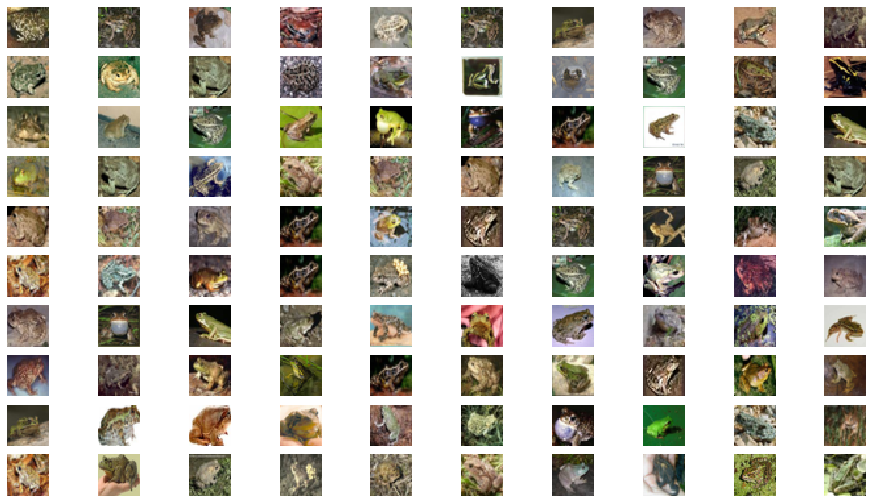

In [158]:
sv5 = svc5.support_
sv5 = sv5[30000:30200]
xx = X_train_copy.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(10,10,figsize=(16,9))
for j in range(10):
    for k in range(10):
        i = np.random.choice(sv5)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xx[i:i+1][0],interpolation='nearest')

**Plotting the accuracy with the parameter of soft margin cost function**

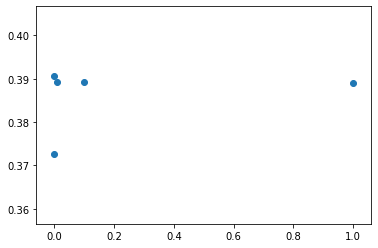

In [147]:
plt.scatter(c, accuracies)

# The C parameter tells about the miss-classification in SVM. For Larger value of C the optimization will choose a smaller margin hyperplane. For smaller value of C, the optimization will choose a larger margin hyperplane. So the size of the margin of hyperplane is inversely propotional to C.

**Image classification using KNN algorithm with K = 4**

In [0]:
from numpy.random import RandomState
from collections import Counter

def accuracy(y_real, y_pred):
#    print("y_real ",len(y_real))
#    print("y_pred ",len(y_pred))
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

def euclidean_distance(row):
    return np.sqrt(np.sum((X_train - row) ** 2, axis=1))

def prediction(row,k):
    dist = euclidean_distance(row)
    indexes = np.argsort(dist)[:k]
    neighbors = Y_train[indexes]
    match = Counter(neighbors).most_common(1)
    #print(match[0][0])
    return match[0][0]

def predict_euclidean(k):
    y_pred = [prediction(x,k) for x in X_test]
    return np.array(y_pred)

predictions_k = predict_euclidean(4)
accuracy(Y_test, predictions_k)

0.4062

In [0]:
print(confusion_matrix(Y_test, predictions_k))

[[627  72  52  36  10  20  11  25 103  58]
 [ 51 630  33  43   7  36   8  28  52 126]
 [198  32 222 151  36 103  41  92  39  38]
 [110  57  65 353  18 204  45  78  43  43]
 [187  57  87 169 137  92  61 130  38  39]
 [103  41  90 180  13 396  31  98  30  43]
 [120  90  57 180  19 111 266  55  31  51]
 [ 68  50  42 104  28  81  21 500  22  61]
 [219 115  35  47  14  36   4  22 434  77]
 [ 70 214  45  47   5  32  15  50  47 497]]


In [0]:
print(classification_report(Y_test, predictions_k))

              precision    recall  f1-score   support

           0       0.36      0.62      0.45      1014
           1       0.46      0.62      0.53      1014
           2       0.30      0.23      0.26       952
           3       0.27      0.35      0.30      1016
           4       0.48      0.14      0.21       997
           5       0.36      0.39      0.37      1025
           6       0.53      0.27      0.36       980
           7       0.46      0.51      0.49       977
           8       0.52      0.43      0.47      1003
           9       0.48      0.49      0.48      1022

    accuracy                           0.41     10000
   macro avg       0.42      0.40      0.39     10000
weighted avg       0.42      0.41      0.39     10000



# The accuracy using SVM with C = 0.001 is 0.3906 and with KNN setting K= 4 the accuracy is 0.4062